# Question 1: Introduction to Exploratory Data Analysis (EDA)

###(a) Display first and last 5 rows of the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("/content/sample_data/SpotifyAudioFeaturesApril2019.csv")

In [3]:
print(df.head())
print(df.tail())

  artist_name                track_id  \
0          YG  2RM4jf1Xa9zPgMGRDiht8O   
1          YG  1tHDG53xJNGsItRA3vfVgs   
2       R3HAB  6Wosx2euFPMT14UXiWudMy   
3  Chris Cooq  3J2Jpw61sO7l6Hc7qdYV91   
4  Chris Cooq  2jbYvQCyPgX3CdmAzeVeuS   

                                       track_name  acousticness  danceability  \
0  Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj      0.005820         0.743   
1                    BAND DRUM (feat. A$AP Rocky)      0.024400         0.846   
2                                   Radio Silence      0.025000         0.603   
3                                         Lactose      0.029400         0.800   
4                             Same - Original mix      0.000035         0.783   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0       238373   0.339             0.000    1    0.0812    -7.678     1   
1       214800   0.557             0.000    8    0.2860    -7.259     1   
2       138913   0.723             0.000 

###(b) Print dataset shape and column names

In [5]:
print("Shape:", df.shape)
print("Columns:")
print(df.columns)

Shape: (130663, 17)
Columns:
Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')


###(c) Use info() and describe().

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       130663 non-null  object 
 1   track_id          130663 non-null  object 
 2   track_name        130662 non-null  object 
 3   acousticness      130663 non-null  float64
 4   danceability      130663 non-null  float64
 5   duration_ms       130663 non-null  int64  
 6   energy            130663 non-null  float64
 7   instrumentalness  130663 non-null  float64
 8   key               130663 non-null  int64  
 9   liveness          130663 non-null  float64
 10  loudness          130663 non-null  float64
 11  mode              130663 non-null  int64  
 12  speechiness       130663 non-null  float64
 13  tempo             130663 non-null  float64
 14  time_signature    130663 non-null  int64  
 15  valence           130663 non-null  float64
 16  popularity        13

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,130663.000000,130663.000000,1.306630e+05,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000
mean,0.342500,0.581468,2.126331e+05,0.569196,0.224018,5.231894,0.194886,-9.974006,0.607739,0.112015,119.473353,3.878986,0.439630,24.208988
std,0.345641,0.190077,1.231551e+05,0.260312,0.360328,3.602701,0.167733,6.544379,0.488256,0.124327,30.159636,0.514403,0.259079,19.713191
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031600,0.459000,1.639225e+05,0.396000,0.000000,2.000000,0.097500,-11.898000,0.000000,0.038900,96.014000,4.000000,0.224000,7.000000
50%,0.203000,0.605000,2.019010e+05,0.603000,0.000149,5.000000,0.124000,-7.979000,1.000000,0.055900,120.027000,4.000000,0.420000,22.000000
75%,0.636000,0.727000,2.410475e+05,0.775000,0.440000,8.000000,0.236000,-5.684000,1.000000,0.129000,139.642000,4.000000,0.638000,38.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


###(d) Identify numerical and categorical columns.

In [6]:
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

print("Numerical Columns:\n", numerical_cols)
print("\nCategorical Columns:\n", categorical_cols)

Numerical Columns:
 Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'popularity'],
      dtype='object')

Categorical Columns:
 Index(['artist_name', 'track_id', 'track_name'], dtype='object')


# Question 2: Handling Missing Values & Feature Scaling

###(a) Check missing values.

In [7]:
df.isnull().sum()


,0
artist_name,0
track_id,0
track_name,1
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
key,0
liveness,0


###(b) Handle missing values.

In [8]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

###(c) Select numerical features: danceability, energy, loudness, tempo, valence

In [9]:
features = ['danceability', 'energy', 'loudness', 'tempo', 'valence']
X = df[features]

###(d) Apply standardization.

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=features)
X_scaled.head()

,danceability,energy,loudness,tempo,valence
0,0.849826,-0.884312,0.350838,2.800232,-1.241440
1,1.391714,-0.046852,0.414862,1.310884,-0.264902
2,0.113279,0.590848,0.624050,-0.149450,-0.222443
3,1.149706,0.037663,-0.327610,0.117033,0.777254
4,1.060268,0.855916,-0.046299,0.019020,1.885026


###(e) Explain normalization vs standardization.

Normalization scales data between 0 and 1 using the minimum and maximum values. It is useful when features have very different ranges but is sensitive to outliers.

Standardization scales data so that it has mean 0 and standard deviation 1. It works well when data follows a normal distribution and is commonly used for models like Logistic Regression.

In this assignment, standardization is used because audio features have different scales and Logistic Regression performs better when features are centered around zero

# Question 3: Data Visualization for EDA

###(a) Histogram of danceability

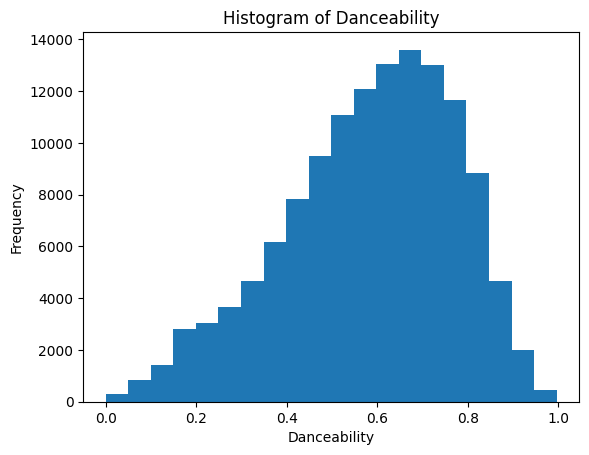

In [13]:
plt.figure()
plt.hist(df['danceability'], bins=20)
plt.xlabel("Danceability")
plt.ylabel("Frequency")
plt.title("Histogram of Danceability")
plt.show()

###(b) Boxplot of energy.

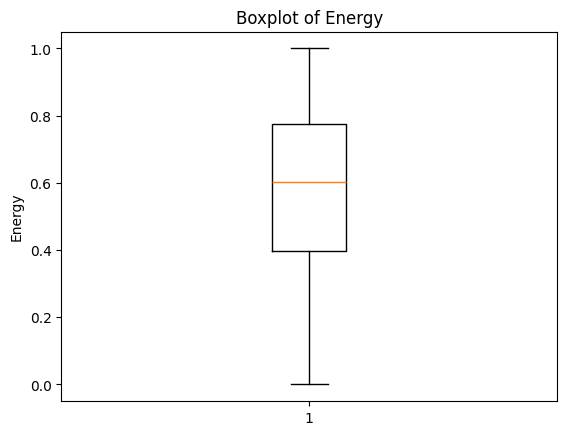

In [14]:
plt.figure()
plt.boxplot(df['energy'])
plt.ylabel("Energy")
plt.title("Boxplot of Energy")
plt.show()

###(c) Scatter plot: energy vs loudness

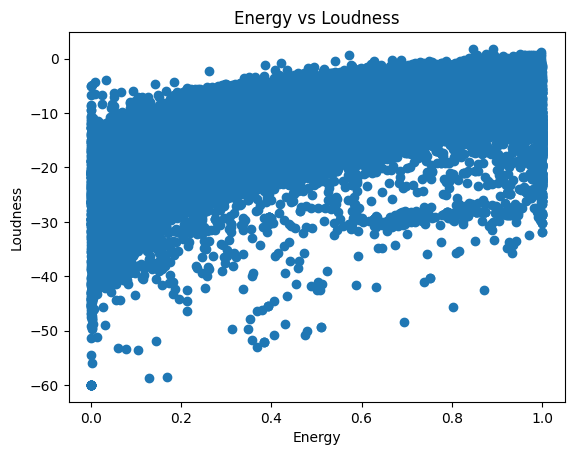

In [15]:
plt.figure()
plt.scatter(df['energy'], df['loudness'])
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.title("Energy vs Loudness")
plt.show()

###(d) Correlation heatmap

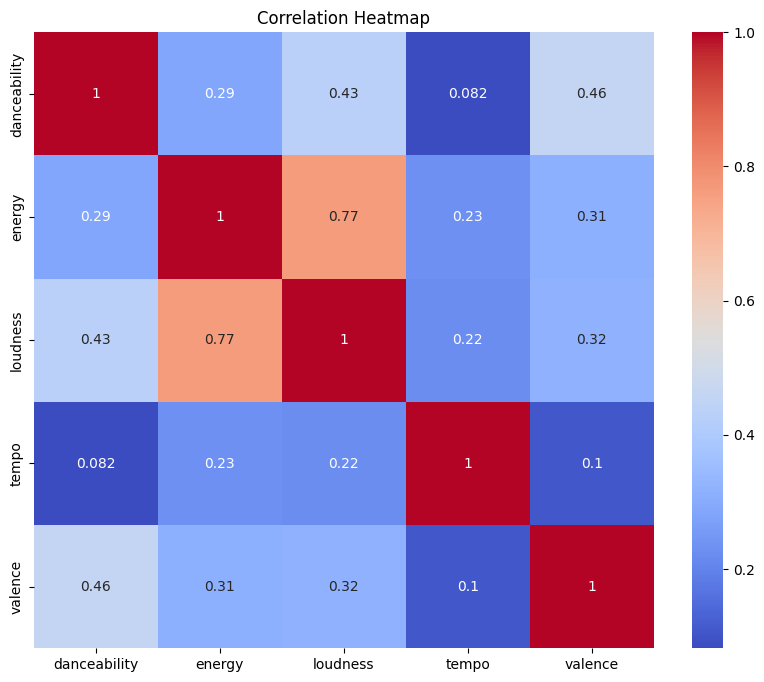

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Question 4: Audio Features & Mood

###(a) Explain danceability, energy, valence.

Danceability:
Measures how suitable a song is for dancing. It depends on rhythm, beat strength, tempo, and overall musical regularity. Higher values indicate songs that are easier to dance to.

Energy:
Represents the intensity and activity of a track. High energy songs sound loud, fast, and powerful, while low energy songs are softer and calmer.

Valence:
Describes the musical positiveness of a song. High valence songs sound happy, cheerful, and upbeat, while low valence songs sound sad, depressed, or angry

###(b) Identify features related to happy or energetic music

High valence is strongly associated with happy and positive mood music.

High energy indicates energetic and intense songs.

High danceability often represents fun, upbeat, and rhythmic tracks.

Therefore, songs that are happy and energetic usually have high valence, high energy, and high danceability values.

# Question 5: Supervised Learning – Classification

###(a) Create mood column using valence.

In [17]:
df['mood'] = df['valence'].apply(lambda x: 1 if x >= 0.5 else 0)

###(b) Train-test split (80-20).

In [18]:
X = X_scaled
y = df['mood']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

###(c) Train Logistic Regression.

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

###(d) Evaluate using accuracy and confusion matrix.

In [20]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9998086710289672

Confusion Matrix:
 [[15491     2]
 [    3 10637]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15493
           1       1.00      1.00      1.00     10640

    accuracy                           1.00     26133
   macro avg       1.00      1.00      1.00     26133
weighted avg       1.00      1.00      1.00     26133

